In [1]:
#!pip install ipysankeywidget
#!jupyter nbextension enable --py --sys-prefix ipysankeywidget

In [3]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector
#%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]
from matplotlib.sankey import Sankey

In [7]:
db_connection =  mysql.connector.connect(
        user= "local",
        password= "local",
        database= "trajectories"
    );
def qry(sql):
    #print sql;
    return pd.read_sql(sql, con=db_connection)

[Bunch(texts=[Text(-0.515,0.427414,u'cran\n0.03'), Text(-0.659023,-0.015,u'cpan\n0.05'), Text(0.458737,0,u'cran\n0.08')], angles=[3, 0, 0], text=Text(0,0,u''), tips=[[-0.515       0.27741351]
  [-0.50902251 -0.015     ]
  [ 0.30873697  0.        ]], flows=[ 0.03  0.05 -0.08], patch=Poly((-0.25, 0.04) ...))]

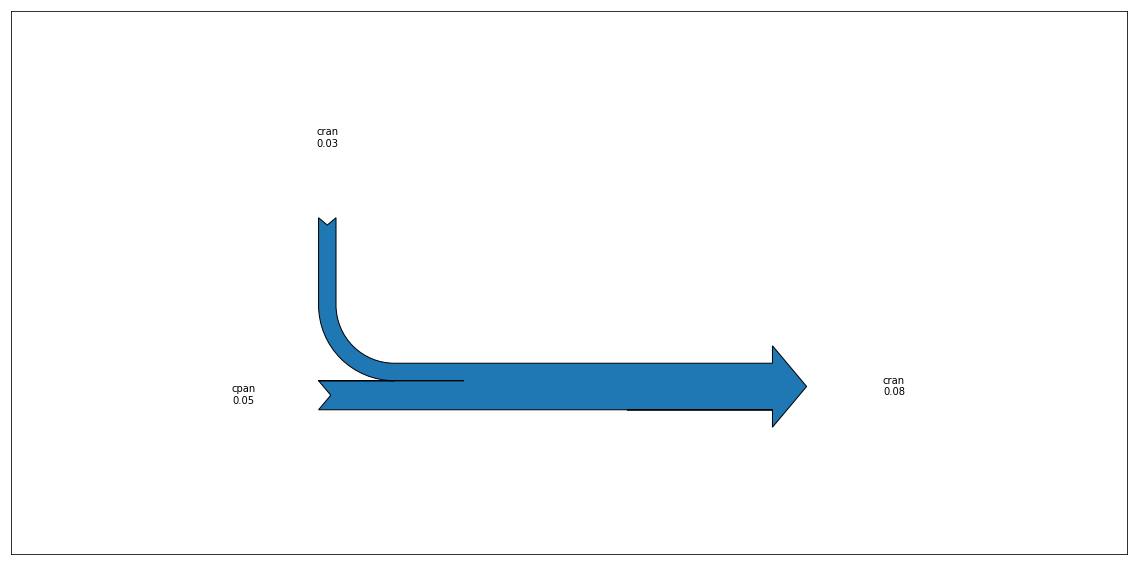

In [14]:
Sankey(flows=[.03,.05,-.08], labels=['cran','cpan','cran'], orientations=[1,0,0]).finish()

Text(0.5,1,'The default settings produce a diagram like this.')

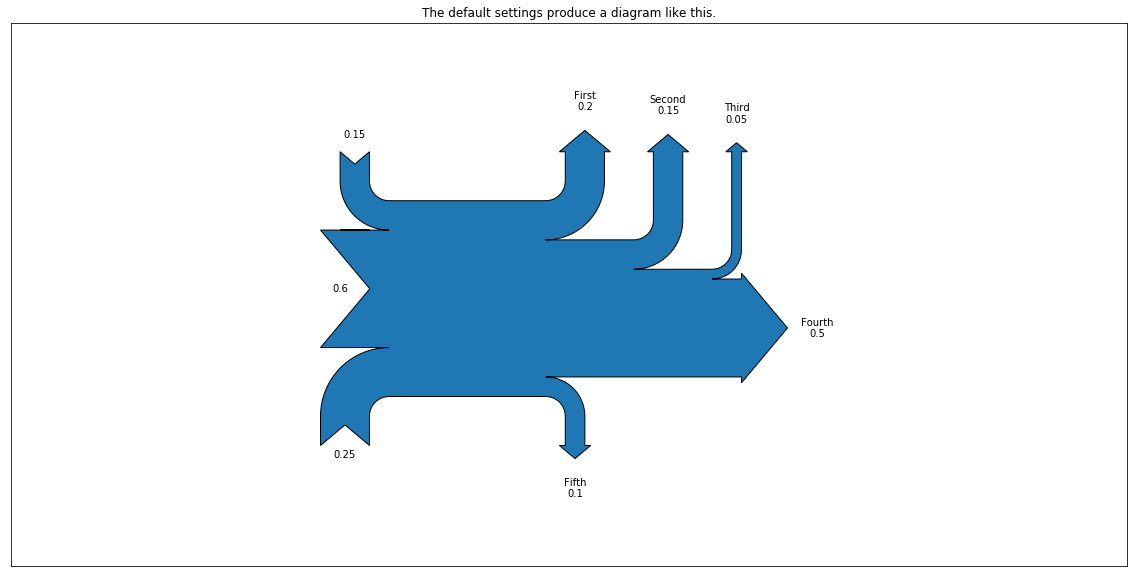

In [4]:
Sankey(flows=[0.25, 0.15, 0.60, -0.20, -0.15, -0.05, -0.50, -0.10],
       labels=['', '', '', 'First', 'Second', 'Third', 'Fourth', 'Fifth'],
       orientations=[-1, 1, 0, 1, 1, 1, 0, -1]).finish()
plt.title("The default settings produce a diagram like this.")

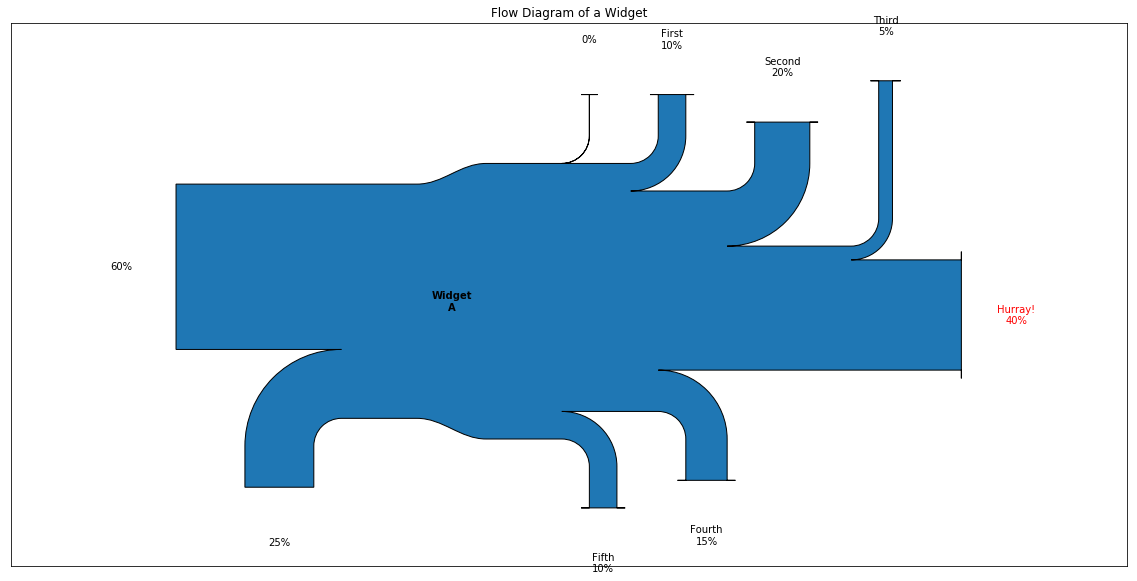

In [5]:
###############################################################################
# Notice:
#
# 1. Axes weren't provided when Sankey() was instantiated, so they were
#    created automatically.
# 2. The scale argument wasn't necessary since the data was already
#    normalized.
# 3. By default, the lengths of the paths are justified.


###############################################################################
# Example 2
#
# This demonstrates:
#
# 1. Setting one path longer than the others
# 2. Placing a label in the middle of the diagram
# 3. Using the scale argument to normalize the flows
# 4. Implicitly passing keyword arguments to PathPatch()
# 5. Changing the angle of the arrow heads
# 6. Changing the offset between the tips of the paths and their labels
# 7. Formatting the numbers in the path labels and the associated unit
# 8. Changing the appearance of the patch and the labels after the figure is
#    created

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[],
                     title="Flow Diagram of a Widget")
sankey = Sankey(ax=ax, scale=0.01, offset=0.2, head_angle=180,
                format='%.0f', unit='%')
sankey.add(flows=[25, 0, 60, -10, -20, -5, -15, -10, -40],
           labels=['', '', '', 'First', 'Second', 'Third', 'Fourth',
                   'Fifth', 'Hurray!'],
           orientations=[-1, 1, 0, 1, 1, 1, -1, -1, 0],
           pathlengths=[0.25, 0.25, 0.25, 0.25, 0.25, 0.6, 0.25, 0.25,
                        0.25],
           patchlabel="Widget\nA")  # Arguments to matplotlib.patches.PathPatch()
diagrams = sankey.finish()
diagrams[0].texts[-1].set_color('r')
diagrams[0].text.set_fontweight('bold')

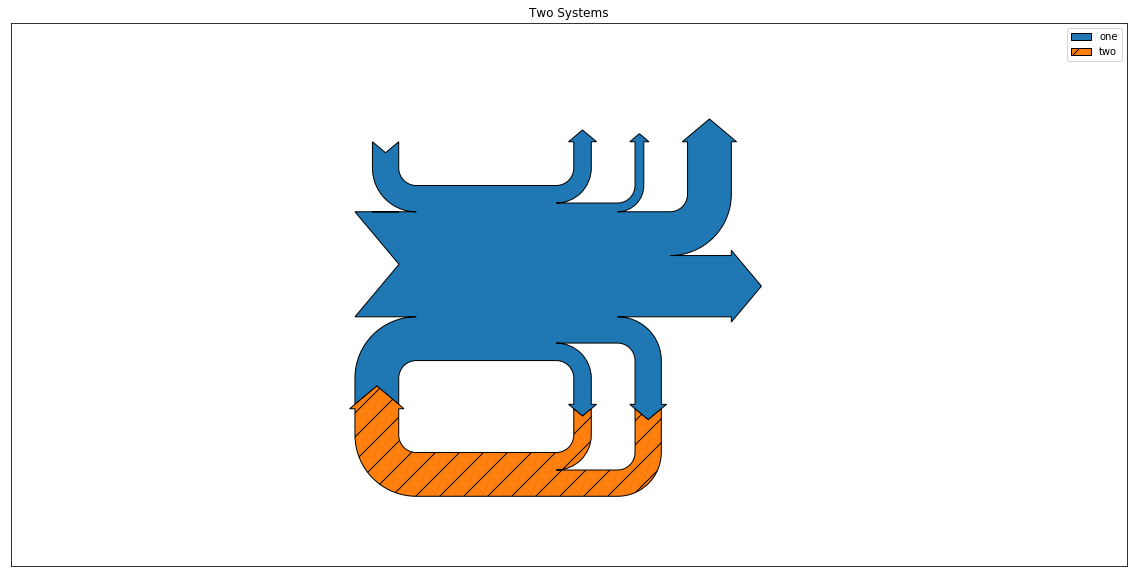

In [6]:
###############################################################################
# Notice:
#
# 1. Since the sum of the flows is nonzero, the width of the trunk isn't
#    uniform.  If verbose.level is helpful (in matplotlibrc), a message is
#    given in the terminal window.
# 2. The second flow doesn't appear because its value is zero.  Again, if
#    verbose.level is helpful, a message is given in the terminal window.


###############################################################################
# Example 3
#
# This demonstrates:
#
# 1. Connecting two systems
# 2. Turning off the labels of the quantities
# 3. Adding a legend

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[], title="Two Systems")
flows = [0.25, 0.15, 0.60, -0.10, -0.05, -0.25, -0.15, -0.10, -0.35]
sankey = Sankey(ax=ax, unit=None)
sankey.add(flows=flows, label='one',
           orientations=[-1, 1, 0, 1, 1, 1, -1, -1, 0])
sankey.add(flows=[-0.25, 0.15, 0.1], label='two',
           orientations=[-1, -1, -1], prior=0, connect=(0, 0))
diagrams = sankey.finish()
diagrams[-1].patch.set_hatch('/')
plt.legend(loc='best')

###############################################################################
# Notice that only one connection is specified, but the systems form a
# circuit since: (1) the lengths of the paths are justified and (2) the
# orientation and ordering of the flows is mirrored.

plt.show()

In [45]:
import json, urllib
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print __version__ # requires version >= 1.9.0
import plotly.graph_objs as go

init_notebook_mode(connected=True)


1.12.4


In [66]:
ecos = qry("select distinct(ecosystem) from traj_top where ecosystem like '%'")
def ecoindex(eco):
    return ecos.index[ecos.ecosystem == eco][0]

In [67]:
kounts = qry("select source.ecosystem  src, target.ecosystem  trg, count(distinct(source.author)) as value \
from traj_top as source, traj_top as target where source.year = 2012 and target.year=2015 and \
source.author=target.author and source.ecosystem like '%' and target.ecosystem like '%' group by src, trg  ")


In [68]:

#dir(ecos["ecosystem"])df.index[df.LastName == 'Smith']
ecos

,ecosystem
0,Packagist
1,Pypi
2,Rubygems
3,NPM
4,Maven
5,CocoaPods
6,NuGet
7,Atom
8,Hackage
9,Go


In [69]:
#kounts["xxx"] = kounts.apply(lambda row: ecos.index(row["src"], axis=1))
kounts["source"] = kounts.apply(lambda row: ecoindex(row["src"]), axis=1)
kounts["target"] = kounts.apply(lambda row: ecoindex(row["trg"])+len(ecos), axis=1)   
kounts

,src,trg,value,source,target
0,Atom,Atom,3,7,23
1,Atom,Go,2,7,25
2,Atom,NPM,13,7,19
3,Atom,NuGet,1,7,22
4,Atom,Packagist,1,7,16
5,Atom,Rubygems,1,7,18
6,Cargo,Cargo,28,14,30
7,Cargo,Go,5,14,25
8,Cargo,Hackage,1,14,24
9,Cargo,Hex,1,14,29


In [71]:
data_trace = dict(
    type='sankey',
    domain = dict(
      x =  [0,1],
      y =  [0,1]
    ),
    orientation = "h",
    valueformat = ".0f",
    node = dict(
      pad = 10,
      thickness = 30,
      line = dict(
        color = "black",
        width = 0.5
      ),
      label =  kounts['src'].dropna(axis=0, how='any')#,
      #color = refugee_df['Color']
    ),
    link = dict(
      source = kounts['source'].dropna(axis=0, how='any'),
      target = kounts['target'].dropna(axis=0, how='any'),
      value = kounts['value'].dropna(axis=0, how='any'),
  )
)

layout =  dict(
    title = "Migration of developers from 2012 to 2013",
    height = 772,
    width = 950,
    font = dict(
      size = 10
    ),    
)


fig = dict(data=[data_trace], layout=layout)
iplot(fig, validate=False)